# Vamos a realizar una analisis exploratorio para entender mejor el dataset y realizar las transformaciones necesarias para las visualizaciones·

In [1]:
#cargamos el dataset para realizar una exploracion inicial
from google.colab import files
files.upload()

Saving netflix_titles.csv to netflix_titles.csv


{'netflix_titles.csv': b'show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,,,,,,,,,,,,,,\r\ns1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.",,,,,,,,,,,,,,\r\ns2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was ab

In [71]:
import pandas as pd
import numpy as np

df = pd.read_csv('netflix_titles.csv',encoding='Latin')
df.head()


show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  ... Unnamed: 16  \
0  September 25, 2021          2020  PG-13     90 min  ...         NaN   
1  September 24, 2021          2021  TV-MA  2 Seasons  ...         NaN   
2  September 24, 2021          2021  TV-MA   1 Season  ...         NaN   
3  September 24, 2021          2021  TV-MA   1 Season  ...         NaN   
4  September 24, 2021          2021  TV-MA  2 Seasons  ...         NaN   

  Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21  \
0         NaN          NaN          NaN          NaN          NaN   
1         NaN          NaN          NaN          NaN          NaN   
2         NaN          NaN          NaN          NaN          NaN   
3         NaN          NaN          NaN          NaN          NaN   
4         NaN          NaN          NaN          NaN          NaN   

   Unnamed: 22  Unnamed: 23  Unnamed: 24  Unnamed: 25  
0          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN  

[5 rows x 26 columns]

In [72]:
df.info() #info general

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [73]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [74]:
df.isnull().sum() #valores nulos

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64

In [75]:
# identificamos las columnas a eliminar
drop = df.columns[12:26]

# las eliminamos
df = df.drop(columns=drop)

# verificamos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [76]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [77]:
# guardamos
#df.to_csv('netflix_limpio.csv', index=False)

# Descargar el archivo CSV
#files.download('netflix_limpio.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Para una distribución más precisa de títulos por país, vamos a eliminar los registros nulos y vacíos.
Esta depuración de datos permitirá un mejor análisis, facilitando la identificación de patrones y tendencias relevantes en la información.

In [8]:
# eliminamos los valores nulos de la columna country
df_sin_nulos_country = df.dropna(subset=['country'])


In [9]:
df_sin_nulos_country.isnull().sum() #valores nulos

show_id            0
type               0
title              0
director        2225
cast             671
country            0
date_added         9
release_year       0
rating             3
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
# verificamos si hay datos aninados
df_sin_nulos_country['num_paises'] = df_sin_nulos_country['country'].str.count(',') + 1

# filtramos filas donde hay mas de un pais
filas_con_multiples_paises = df_sin_nulos_country[df_sin_nulos_country['num_paises'] > 1]

# contamos filas con datos anidados
num_filas_con_multiples_paises = filas_con_multiples_paises.shape[0]

print("\nNumero total de filas con datos aninados:")
print(num_filas_con_multiples_paises)



Numero total de filas con datos aninados:
1320


<ipython-input-10-a5c92e6fe9cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos_country['num_paises'] = df_sin_nulos_country['country'].str.count(',') + 1


In [11]:
# separamos los valores en la columna 'country' en distintas filas
df_separado = df_sin_nulos_country.assign(country=df_sin_nulos_country['country'].str.split(',')).explode('country')

# eliminamos posibles espacios en blanco
df_separado['country'] = df_separado['country'].str.strip()


# mostramos el numero total de filas e
print("\nNumero total de filas despues de separar los datos:")
print(df_separado.shape[0])


Numero total de filas despues de separar los datos:
10021


In [12]:
df_separado.isnull().sum()

show_id            0
type               0
title              0
director        2561
cast             852
country            0
date_added         9
release_year       0
rating             3
duration           3
listed_in          0
description        0
num_paises         0
dtype: int64

In [13]:
# guardamos
#df_separado.to_csv('archivo_limpio_country.csv', index=False)

# Descargar el archivo CSV
#files.download('archivo_limpio_country.csv')

Detectamos en el dashboard valores vacios

In [14]:
# los valores vacios pueden ser NaN, cadenas vacias o espacios en blanco
valores_vacios = df_separado['country'].isna() | (df_separado['country'].str.strip() == '')

# contamos los valores vacios
num_valores_vacios = valores_vacios.sum()

# filtramos filas
filas_vacias = df_separado[valores_vacios]

print("\nNumero total de valores vacios en 'country':")
print(num_valores_vacios)


Numero total de valores vacios en 'country':
7


In [15]:
# eliminamos las filas con valores vacíos
df_sin_vacios = df_separado[~valores_vacios]

In [16]:
# los valores vacios pueden ser NaN, cadenas vacias o espacios en blanco
valores_vacios = df_sin_vacios['country'].isna() | (df_sin_vacios['country'].str.strip() == '')

# contamos los valores vacios
num_valores_vacios = valores_vacios.sum()

# filtramos filas
filas_vacias = df_separado[valores_vacios]


print("\nNumero total de valores vacios en 'country':")
print(num_valores_vacios)


Numero total de valores vacios en 'country':
0


<ipython-input-16-760bf86b9d4e>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filas_vacias = df_separado[valores_vacios]


In [17]:
# guardamos
#df_sin_vacios.to_csv('archivo_limpio_country.csv', index=False)

# Descargar el archivo CSV
#files.download('archivo_limpio_country.csv')

A primera vista, se observan datos anidados. Es fundamental desglosar esta información, asegurando que las relaciones y jerarquías entre los datos sean claras.


In [18]:
valores_unicos = df['listed_in'].unique()
print("Valores unicos en 'listed_in':")
print(valores_unicos)


Valores unicos en 'listed_in':
['Documentaries' 'International TV Shows, TV Dramas, TV Mysteries'
 'Crime TV Shows, International TV Shows, TV Action & Adventure'
 'Docuseries, Reality TV'
 'International TV Shows, Romantic TV Shows, TV Comedies'
 'TV Dramas, TV Horror, TV Mysteries' 'Children & Family Movies'
 'Dramas, Independent Movies, International Movies'
 'British TV Shows, Reality TV' 'Comedies, Dramas'
 'Crime TV Shows, Docuseries, International TV Shows'
 'Dramas, International Movies' 'Children & Family Movies, Comedies'
 'British TV Shows, Crime TV Shows, Docuseries' 'TV Comedies, TV Dramas'
 'Documentaries, International Movies'
 'Crime TV Shows, Spanish-Language TV Shows, TV Dramas' 'Thrillers'
 'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure'
 'International TV Shows, TV Action & Adventure, TV Dramas'
 'Comedies, International Movies'
 'Comedies, International Movies, Romantic Movies'
 'Docuseries, International TV Shows, Reality TV'
 'Comedies,

In [19]:
# necesitamos que todos los valores sean cadenas
df['listed_in'] = df['listed_in'].astype(str)

In [20]:
# separamos en filas individuales
df_desanidado = df.assign(listed_in=df['listed_in'].str.split(',')).explode('listed_in')

In [21]:
# eliminamos espacios en blanco
df_desanidado['listed_in'] = df_desanidado['listed_in'].str.strip()

#eliminamos filas con valores vacios
df_desanidado = df_desanidado[df_desanidado['listed_in'] != '']

In [22]:
df_desanidado.head()

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   
1      s2  TV Show         Blood & Water              NaN   
1      s2  TV Show         Blood & Water              NaN   
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   

           date_added  release_year rating   duration               listed_in  \
0  September 25, 2021          2020  PG-13     90 min           Documentaries   
1  September 24, 2021          2021  TV-MA  2 Seasons  International TV Shows   
1  September 24, 2021          2021  TV-MA  2 Seasons               TV Dramas   
1  September 24, 2021          2021  TV-MA  2 Seasons            TV Mysteries   
2  September 24, 2021          2021  TV-MA   1 Season          Crime TV Shows   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
1  After crossing paths at a party, a Cape Town t...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...

In [23]:
#df_desanidado.to_csv('df_netflix_genres.csv', index=False)
#files.download('df_netflix_genres.csv')

# Parte 2 Evolución de la cantidad de títulos lanzados por año.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [25]:
df['date_added'].sample(n=10, random_state=1)

2894     February 21, 2020
2161        August 6, 2020
7076         April 1, 2018
2575           May 2, 2020
2698         April 9, 2020
5257    September 29, 2017
5762       October 1, 2016
863           May 20, 2021
8692     December 26, 2017
3627        August 2, 2019
Name: date_added, dtype: object

In [26]:
# buscamos valores nulos
nulos_date_added = df['date_added'].isnull().sum()
print(f'Valores nulos en date_added: {nulos_date_added}')

# buscamos valores vacios
vacíos_date_added = (df['date_added'] == '').sum()
print(f'Valores vacios en date_added: {vacíos_date_added}')

Valores nulos en date_added: 10
Valores vacios en date_added: 0


In [27]:
# eliminamos filas con valores nulos
df_date_clean = df.dropna(subset=['date_added'])

In [28]:
nulos_date_added = df_date_clean['date_added'].isnull().sum()
print(f'Valores nulos en date_added: {nulos_date_added}')

Valores nulos en date_added: 0


In [29]:
df_date_clean['date_added'].sample(n=10, random_state=1)


8358         June 19, 2017
7639       October 1, 2019
7031       August 15, 2018
3458       October 2, 2019
5667     December 15, 2016
5240       October 1, 2017
1936    September 29, 2020
331         August 1, 2021
5650       January 1, 2017
4171      January 25, 2019
Name: date_added, dtype: object

In [30]:
# convertimos la columna date_added al formato de fecha
df_date_clean['date_added'] = pd.to_datetime(df_date_clean['date_added'], format='%B %d, %Y', errors='coerce')

# verificamos
print(df_date_clean['date_added'].head())

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]


<ipython-input-30-8172a9b62572>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_clean['date_added'] = pd.to_datetime(df_date_clean['date_added'], format='%B %d, %Y', errors='coerce')


Hemos identificado un total de 88 nulos, lo cual podría deberse a problemas de formato, datos incompletos o ingresos incorrectos. Dado que esta cifra representa un porcentaje bajo del total de los datos analizados, procedemos a su eliminación para mantener la integridad y la calidad de la información.

In [31]:
# verificamos el tipo de dato
print(df_date_clean['date_added'].dtype)

datetime64[ns]


In [32]:
# realizamos nuevamente la conversion
df_date_clean['date_added'] = pd.to_datetime(df_date_clean['date_added'], format='%B %d, %Y', errors='coerce')

# verificamos
print(df_date_clean['date_added'].head())
print(df_date_clean['date_added'].dtype)

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]
datetime64[ns]


<ipython-input-32-7ad581afedf2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_clean['date_added'] = pd.to_datetime(df_date_clean['date_added'], format='%B %d, %Y', errors='coerce')


In [33]:
# extraemos el año y lo guardamos en una nueva columna: netflix_release_year
df_date_clean['netflix_release_year'] = df_date_clean['date_added'].dt.year

print(df_date_clean[['date_added', 'netflix_release_year']].head())

  date_added  netflix_release_year
0 2021-09-25                2021.0
1 2021-09-24                2021.0
2 2021-09-24                2021.0
3 2021-09-24                2021.0
4 2021-09-24                2021.0


<ipython-input-33-aa8e8a46d0f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_clean['netflix_release_year'] = df_date_clean['date_added'].dt.year


In [34]:
df_date_clean['date_added'].isnull().sum()

88

In [35]:
df_date_clean = df_date_clean.dropna(subset=['date_added'])

In [36]:
# verificamos el tipo de dato
print(df_date_clean['netflix_release_year'].dtype)

float64


In [37]:
# convertimos la columna netflix_release_year a entero
df_date_clean['netflix_release_year'] = df_date_clean['netflix_release_year'].astype('Int64')


<ipython-input-37-2f9369af649a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_clean['netflix_release_year'] = df_date_clean['netflix_release_year'].astype('Int64')


In [38]:
# verificamos
print(df_date_clean['netflix_release_year'].dtype)

Int64


In [39]:
df_date_clean['netflix_release_year'].sample(n=10, random_state=1)


4228    2019
6631    2017
3983    2019
8111    2019
2934    2020
5467    2017
8501    2019
1806    2020
6860    2017
4453    2018
Name: netflix_release_year, dtype: Int64

In [40]:
df_date_clean.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  netflix_release_year  
0  As her father nears the end of his life, filmm...                  2021  
1  After crossing paths at a party, a Cape Town t...                  2021  
2  To protect his family from a powerful drug lor...                  2021  
3  Feuds, flirtations and toilet talk go down amo...                  2021  
4  In a city of coaching centers known to train I...                  2021

In [41]:
# agrupamos por año de lanzamiento y contamos los titulos
titulos_por_anio = df_date_clean.groupby('netflix_release_year').size().reset_index(name='title_count')

# ordenamos por año
titulos_por_anio = titulos_por_anio.sort_values(by='netflix_release_year')

print(titulos_por_anio)

    netflix_release_year  title_count
0                   2008            2
1                   2009            2
2                   2010            1
3                   2011           13
4                   2012            3
5                   2013           10
6                   2014           23
7                   2015           73
8                   2016          418
9                   2017         1164
10                  2018         1625
11                  2019         1999
12                  2020         1878
13                  2021         1498
14                  2024            2


In [67]:
df_date_clean.isnull().sum()

show_id                    0
type                       0
title                      0
director                2541
cast                     817
country                  827
date_added                 0
release_year               0
rating                     4
duration                   3
listed_in                  0
description                0
netflix_release_year       0
dtype: int64

In [68]:
df_date_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8711 entries, 0 to 8808
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   show_id               8711 non-null   object        
 1   type                  8711 non-null   object        
 2   title                 8711 non-null   object        
 3   director              6170 non-null   object        
 4   cast                  7894 non-null   object        
 5   country               7884 non-null   object        
 6   date_added            8711 non-null   datetime64[ns]
 7   release_year          8711 non-null   int64         
 8   rating                8707 non-null   object        
 9   duration              8708 non-null   object        
 10  listed_in             8711 non-null   object        
 11  description           8711 non-null   object        
 12  netflix_release_year  8711 non-null   Int64         
dtypes: Int64(1), datetime64

In [43]:
#df_date_clean.to_csv('netflix_release_year.csv', index=False)
#files.download('netflix_release_year.csv')

# Parte 3: Análisis Avanzado con Python

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [45]:
# exploremos la columna duration
print(df['duration'].head())

0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
Name: duration, dtype: object


In [46]:
# verificamos que tengan relacion con la columna type
print(df['type'].head())

0      Movie
1    TV Show
2    TV Show
3    TV Show
4    TV Show
Name: type, dtype: object


In [47]:
# convertimos la columna date_added al formato de fecha
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

# extraemos el año y creamos laa columna netflix_release_year
df['netflix_release_year'] = df['date_added'].dt.year

In [48]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  netflix_release_year  
0  As her father nears the end of his life, filmm...                2021.0  
1  After crossing paths at a party, a Cape Town t...                2021.0  
2  To protect his family from a powerful drug lor...                2021.0  
3  Feuds, flirtations and toilet talk go down amo...                2021.0  
4  In a city of coaching centers known to train I...                2021.0

In [49]:
# divimos el df en movie y tv show
df_movies = df[df['type'] == 'Movie'].copy()
df_tv = df[df['type'] == 'TV Show'].copy()

In [50]:
# tomamos una muestra aleatorea para verificar coherencia
df_movies['duration'].sample(n=10, random_state=1)

2441     95 min
4969    115 min
3346     36 min
2625    140 min
5819     73 min
3759    142 min
705      89 min
3786    109 min
1621    120 min
4347     90 min
Name: duration, dtype: object

In [51]:
# tomamos una muestra aleatorea para verificar coherencia
df_tv['duration'].sample(n=10, random_state=1)


4988     1 Season
4627     1 Season
5388     1 Season
7872     1 Season
1667    3 Seasons
1947     1 Season
5097    3 Seasons
4189     1 Season
1579    3 Seasons
4340     1 Season
Name: duration, dtype: object

In [52]:
# reemplazamos ' min' y pasamos a entero considerando valores nulos
df_movies['duration_minutes'] = pd.to_numeric(df_movies['duration'].str.replace(' min', ''), errors='coerce')

print(df_movies[['duration', 'duration_minutes']].head())


   duration  duration_minutes
0    90 min              90.0
6    91 min              91.0
7   125 min             125.0
9   104 min             104.0
12  127 min             127.0


In [53]:
#verificamos
df_movies['duration_minutes'].sample(n=10, random_state=1)

2441     95.0
4969    115.0
3346     36.0
2625    140.0
5819     73.0
3759    142.0
705      89.0
3786    109.0
1621    120.0
4347     90.0
Name: duration_minutes, dtype: float64

In [54]:
# funcion para extraer el numero de temporadas
def extract_seasons(row):
    if pd.isna(row):
        return np.nan
    # eliminamos texto  y pasamos a entero
    try:
        return int(''.join(filter(str.isdigit, row)))
    except ValueError:
        return np.na


In [55]:
# usamos la funcion
df_tv['seasons'] = df_tv['duration'].apply(extract_seasons)

In [56]:
# verificamos
print(df_tv[['duration', 'seasons']].head())

    duration  seasons
1  2 Seasons        2
2   1 Season        1
3   1 Season        1
4  2 Seasons        2
5   1 Season        1


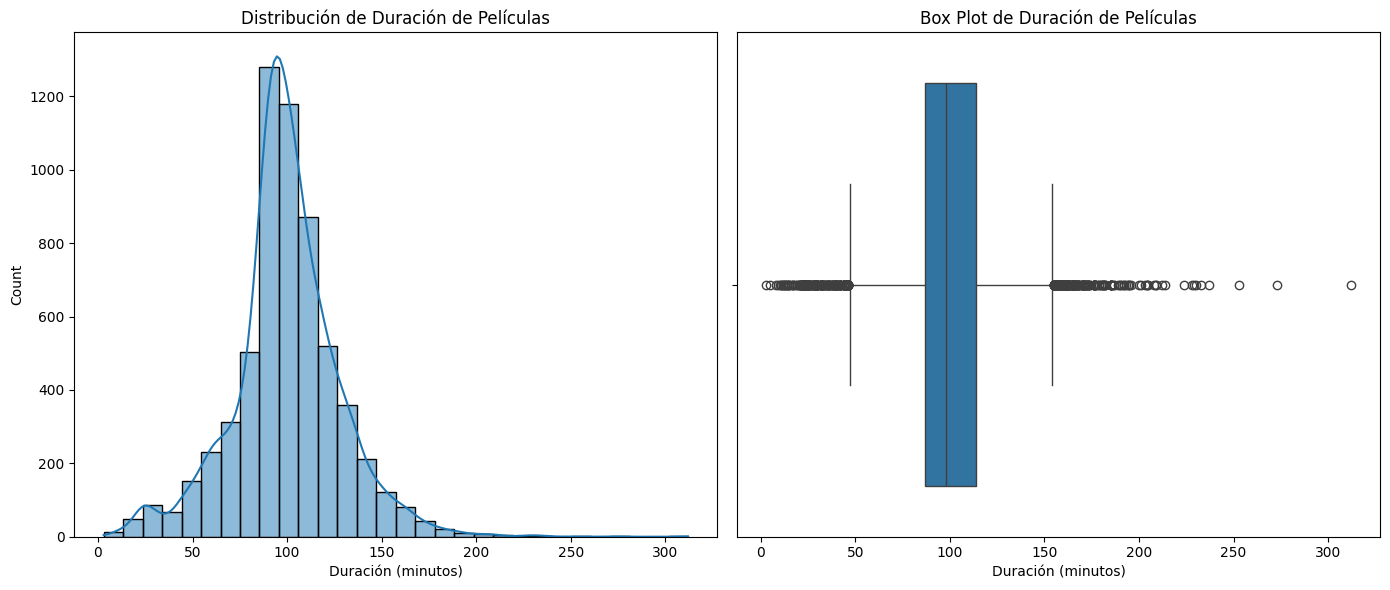

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# histograma de la duracion de las peliculas
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_movies['duration_minutes'].dropna(), bins=30, kde=True)
plt.title('Distribución de Duración de Películas')
plt.xlabel('Duración (minutos)')

# box plot de las duracion de las peliculas
plt.subplot(1, 2, 2)
sns.boxplot(x=df_movies['duration_minutes'].dropna())
plt.title('Box Plot de Duración de Películas')
plt.xlabel('Duración (minutos)')

plt.tight_layout()
plt.show()


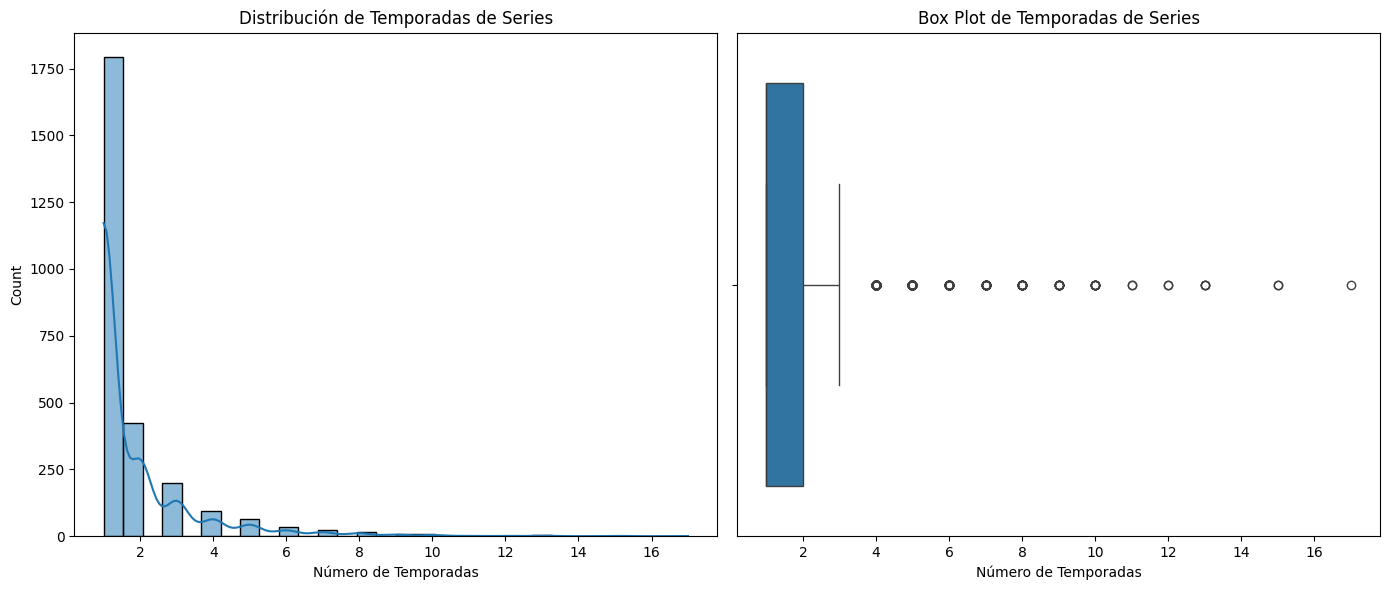

In [58]:
# histogramas de las temporadas
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_tv['seasons'].dropna(), bins=30, kde=True)
plt.title('Distribución de Temporadas de Series')
plt.xlabel('Número de Temporadas')

# box plot de las temporadas
plt.subplot(1, 2, 2)
sns.boxplot(x=df_tv['seasons'].dropna())
plt.title('Box Plot de Temporadas de Series')
plt.xlabel('Número de Temporadas')

plt.tight_layout()
plt.show()


In [59]:
# agrupamos por genero y calculamos la uracion promedio
df_movies['listed_in'] = df_movies['listed_in'].str.split(', ').apply(lambda x: x[0])  # Considerar solo el primer género si hay múltiples

# calculamos la duracion promedio por genero
duration_per_genre_movies = df_movies.groupby('listed_in')['duration_minutes'].mean().reset_index()

# renombramos las columnas para mayor claridad
duration_per_genre_movies.columns = ['Genre', 'Average Duration (minutes)']

print(duration_per_genre_movies.sort_values(by='Average Duration (minutes)', ascending=False))


                       Genre  Average Duration (minutes)
3             Classic Movies                  114.825000
0         Action & Adventure                  113.515716
8                     Dramas                  111.377500
7                      Drama                  110.000000
11      International Movies                  108.062500
4                   Comedies                  106.687603
16          Sci-Fi & Fantasy                  106.615385
5                Cult Movies                  102.500000
19                 Thrillers                   99.953846
12              LGBTQ Movies                   99.000000
10        Independent Movies                   98.700000
9              Horror Movies                   98.174545
1             Anime Features                   90.333333
14          Music & Musicals                   89.555556
17             Sports Movies                   87.000000
15           Romantic Movies                   83.333333
6              Documentaries   

<ipython-input-60-13cf2ddb3998>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Duration (minutes)', y='Genre', data=duration_per_genre_movies_sorted, palette='viridis')


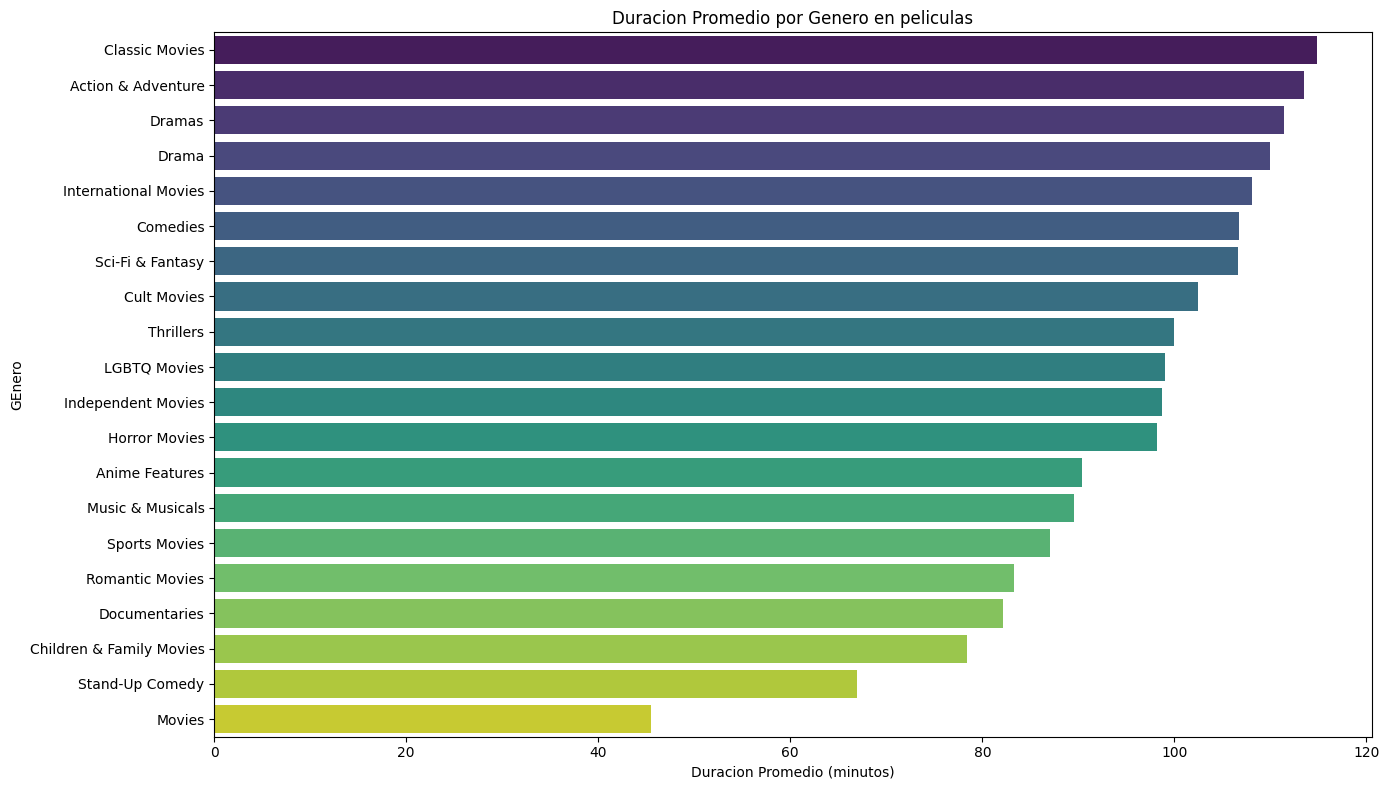

In [60]:
# ordenamos
duration_per_genre_movies_sorted = duration_per_genre_movies.sort_values(by='Average Duration (minutes)', ascending=False)

# graficamos
plt.figure(figsize=(14, 8))
sns.barplot(x='Average Duration (minutes)', y='Genre', data=duration_per_genre_movies_sorted, palette='viridis')

plt.title('Duracion Promedio por Genero en peliculas')
plt.xlabel('Duracion Promedio (minutos)')
plt.ylabel('GEnero')

plt.tight_layout()
plt.show()


In [61]:
# agrupamos por genero y calculamos la cantidad promedio de temporadas
df_tv['listed_in'] = df_tv['listed_in'].str.split(', ').apply(lambda x: x[0])

# calculamos la cantidad promedio de temporadas por generos
seasons_per_genre_tv = df_tv.groupby('listed_in')['seasons'].mean().reset_index()

# renombramos columnas
seasons_per_genre_tv.columns = ['Genre', 'Average Seasons']

print(seasons_per_genre_tv.sort_values(by='Average Seasons', ascending=False))


                           Genre  Average Seasons
2              Classic & Cult TV         5.727273
13                   TV Comedies         3.025000
16           TV Sci-Fi & Fantasy         3.000000
12         TV Action & Adventure         2.950000
14                     TV Dramas         2.865672
8              Romantic TV Shows         2.843750
15                     TV Horror         2.818182
11  Stand-Up Comedy & Talk Shows         2.176471
6                       Kids' TV         1.987113
1               British TV Shows         1.818182
3                 Crime TV Shows         1.706767
0                   Anime Series         1.573864
7                     Reality TV         1.491667
4                     Docuseries         1.366516
5         International TV Shows         1.339793
9                         Sci-fi         1.000000
10     Spanish-Language TV Shows         1.000000
17                      TV Shows         1.000000


<ipython-input-62-e7795e3e4dd4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Seasons', y='Genre', data=seasons_per_genre_tv_sorted, palette='viridis')


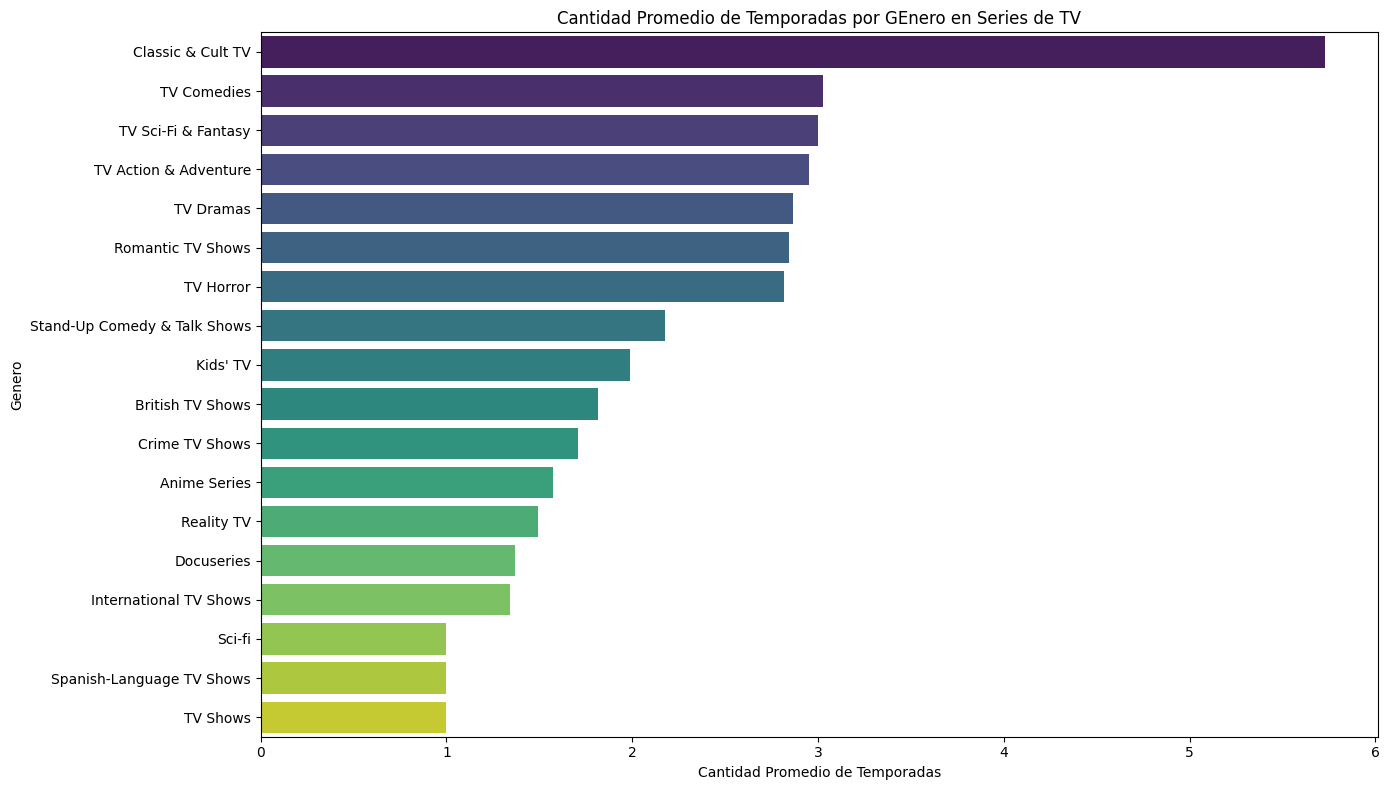

In [62]:
# Ordenar los datos de mayor a menor
seasons_per_genre_tv_sorted = seasons_per_genre_tv.sort_values(by='Average Seasons', ascending=False)

# Configuración del gráfico
plt.figure(figsize=(14, 8))
sns.barplot(x='Average Seasons', y='Genre', data=seasons_per_genre_tv_sorted, palette='viridis')

plt.title('Cantidad Promedio de Temporadas por GEnero en Series de TV')
plt.xlabel('Cantidad Promedio de Temporadas')
plt.ylabel('Genero')

plt.tight_layout()
plt.show()


# Análisis de Tendencias:

Identifica tendencias en el tiempo, como el incremento o decremento de títulos en función del año.

In [63]:
df_tv.head()

show_id     type                  title         director  \
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   
5      s6  TV Show          Midnight Mass    Mike Flanagan   

                                                cast       country date_added  \
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  South Africa 2021-09-24   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...           NaN 2021-09-24   
3                                                NaN           NaN 2021-09-24   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...         India 2021-09-24   
5  Kate Siegel, Zach Gilford, Hamish Linklater, H...           NaN 2021-09-24   

   release_year rating   duration               listed_in  \
1          2021  TV-MA  2 Seasons  International TV Shows   
2          2021  TV-MA   1 Season          Crime TV Shows   
3          2021  TV-MA   1 Season              Docuseries   
4          2021  TV-MA  2 Seasons  International TV Shows   
5          2021  TV-MA   1 Season               TV Dramas   

                                         description  netflix_release_year  \
1  After crossing paths at a party, a Cape Town t...                2021.0   
2  To protect his family from a powerful drug lor...                2021.0   
3  Feuds, flirtations and toilet talk go down amo...                2021.0   
4  In a city of coaching centers known to train I...                2021.0   
5  The arrival of a charismatic young priest brin...                2021.0   

   seasons  
1        2  
2        1  
3        1  
4        2  
5        1

In [64]:
df['netflix_release_year'].sample(10)

3774    2019.0
4898    2018.0
4398    2018.0
2219    2020.0
6747    2015.0
4324    2018.0
1720    2020.0
5099    2018.0
5259    2017.0
4524    2018.0
Name: netflix_release_year, dtype: float64

netflix_release_year
2008       2
2009       2
2010       1
2011      13
2012       3
2013      10
2014      23
2015      73
2016     418
2017    1164
2018    1625
2019    1999
2020    1878
2021    1498
2024       2
Name: count, dtype: int64


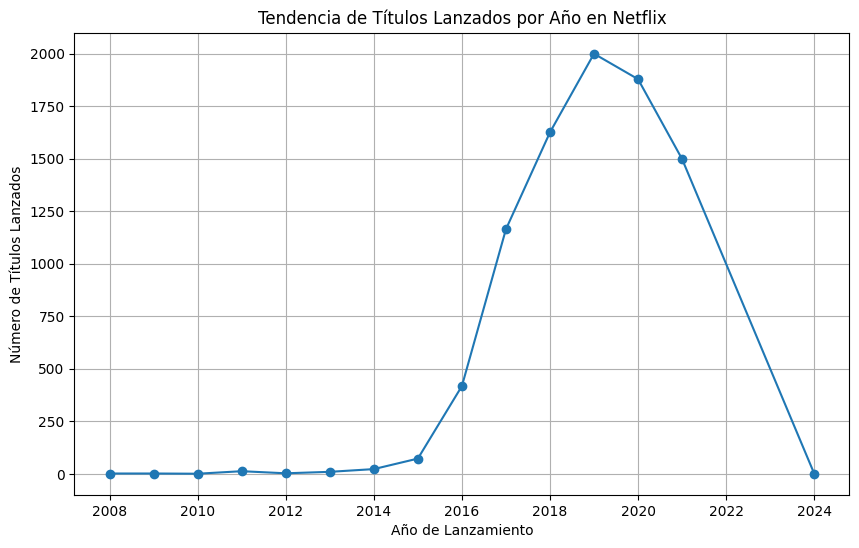

In [65]:
# convertimos la columna netflix_release_year a tipo fecha usando solo el año
df['netflix_release_year'] = pd.to_datetime(df['netflix_release_year'], format='%Y', errors='coerce')

# eliminamos las filas con valores nulos
df = df.dropna(subset=['netflix_release_year'])

# contamos el numero de titulos por año
titles_per_year = df['netflix_release_year'].dt.year.value_counts().sort_index()

print(titles_per_year)

#graficamos

plt.figure(figsize=(10, 6))
plt.plot(titles_per_year.index, titles_per_year.values, marker='o', linestyle='-')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Títulos Lanzados')
plt.title('Tendencia de Títulos Lanzados por Año en Netflix')
plt.grid(True)
plt.show()


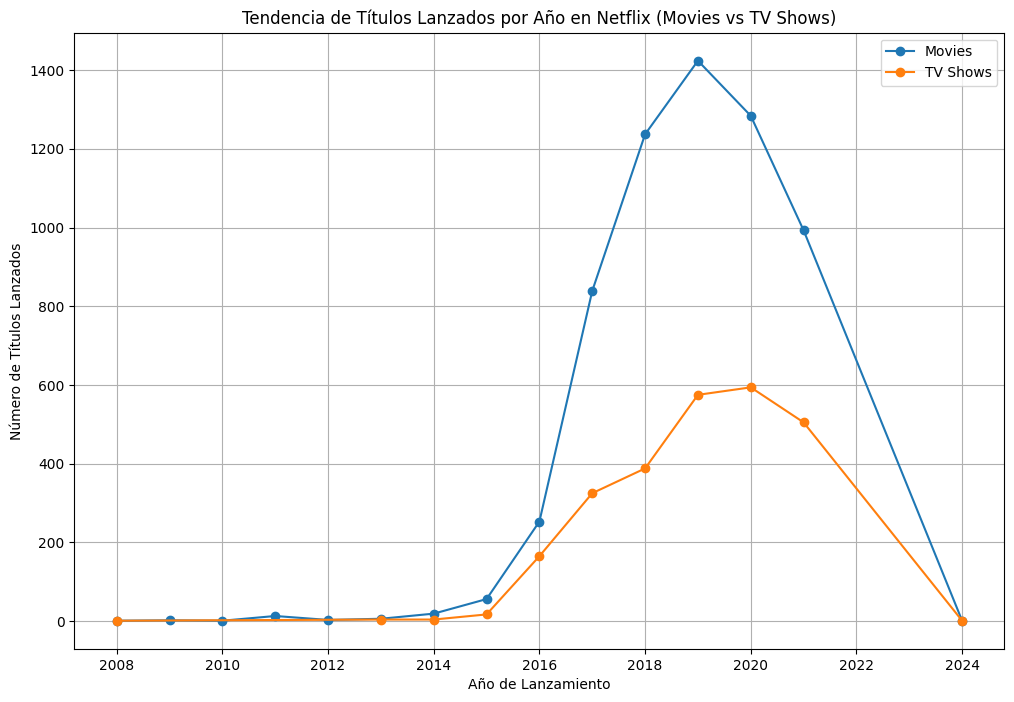

In [66]:
# filtramos los datos por tipo
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# contamos los titulos por año para cada tipo
titles_per_year_movies = movies['netflix_release_year'].dt.year.value_counts().sort_index()
titles_per_year_tv_shows = tv_shows['netflix_release_year'].dt.year.value_counts().sort_index()

# graficamos
plt.figure(figsize=(12, 8))

# graficamos las películas
plt.plot(titles_per_year_movies.index, titles_per_year_movies.values, marker='o', linestyle='-', label='Movies')

# graficamos las series
plt.plot(titles_per_year_tv_shows.index, titles_per_year_tv_shows.values, marker='o', linestyle='-', label='TV Shows')

plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Títulos Lanzados')
plt.title('Tendencia de Títulos Lanzados por Año en Netflix (Movies vs TV Shows)')
plt.legend()
plt.grid(True)

plt.show()
